# STUDENT NAME: ODUFUWA ODUTAYO THOMSON
# MATRIC NO: 209074209
# COURSE CODE: MIT 816

#DECISION TREE CLASSIFIER

##TASK 2 - Using decision tree classifier on imbalanced datasets

###Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.datasets import make_imbalance
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

###Loading the Iris dataset and beginning the prediction process

In [2]:
data = load_iris()

The next step is to separate the features from the target. This is done below

In [3]:
X = data.data #features
y = data.target #target

The dataset is balanced but would be converted to an imbalanced dataset

In [4]:
X_imb, y_imb = make_imbalance(X, y, sampling_strategy = {0:10, 1:25, 2:50}, random_state = 42)

In [5]:
X_imb[:20]

array([[4.3, 3. , 1.1, 0.1],
       [5.1, 3.4, 1.5, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.3],
       [5.1, 3.5, 1.4, 0.3],
       [5.3, 3.7, 1.5, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5. , 3. , 1.6, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [5.7, 2.6, 3.5, 1. ],
       [5.6, 3. , 4.1, 1.3],
       [6.9, 3.1, 4.9, 1.5],
       [5.7, 2.9, 4.2, 1.3],
       [5.7, 3. , 4.2, 1.2],
       [5.5, 2.5, 4. , 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [5.6, 2.7, 4.2, 1.3],
       [5. , 2. , 3.5, 1. ],
       [7. , 3.2, 4.7, 1.4]])

In [28]:
X_imb.shape

(85, 4)

In [6]:
y[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The train_test_split library is applied to split the data into a train and a test part. See code below

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, random_state = 42, test_size = 0.3)

In [8]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred = tree.predict(X_test)

### Metrics Evaluation

Using Confusion Matrix below, the decision tree classifier would be evaluated to correctness.

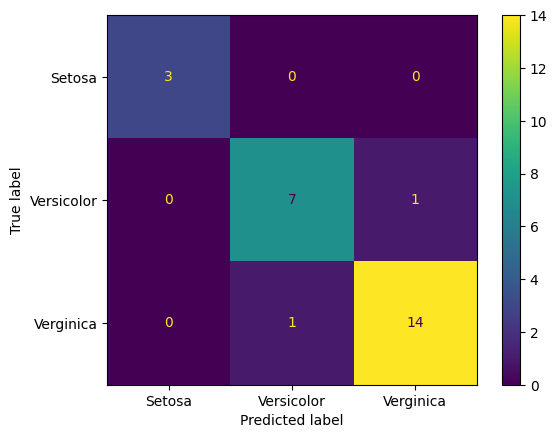

In [10]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Setosa", "Versicolor", "Verginica"])
cm_display.plot()

In [11]:
f1_score = metrics.f1_score(y_test, y_pred, average="macro")
print(f"F1 score is {f1_score}")

F1 score is 0.9361111111111112


###ASSIGNMENT 2

####Question 1: Give the interpretation of the F1 score above and its implication on the classification process

An F1 score of approximately 0.936 indicates that the classification model you're evaluating has achieved a high level of accuracy and balance between precision and recall. Here's how to interpret it:

1. High Overall Performance: An F1 score in the range of 0.9 and above is considered very good. So, 0.936 is an excellent F1 score.

2. High Precision and Recall: This F1 score suggests that the model is making accurate positive predictions (high precision) while also capturing most of the actual positive instances (high recall).

3. Well-Balanced: The F1 score balances the trade-off between precision and recall. In your case, it's close to 1, which means that the model is performing well without a significant trade-off between precision and recall.

4. Effective for Classification: Such a high F1 score indicates that the model is highly effective at classifying instances, especially in tasks where both precision and recall are critical, like medical diagnosis or fraud detection.

In summary, an F1 score of approximately 0.936 is a strong indicator of a well-performing classification model. It suggests that the model is making accurate and comprehensive predictions for the positive class. However, always consider the specific context of your problem and the trade-offs between precision and recall that best suit your application.

####Question 2: Use G-MEAN metric to evaluate the classifier and interpret the result

A function 'g_mean(cm)' is created below to assess/evaluate the classifier. This is used because we're dealing with an imbalanced dataset.

Recall we used the 'accuracy_score' metric, however, that was for a balanced dataset.

In [26]:
def g_mean(cm):
  num_classes = cm.shape[0]
  class_labels = ["Setosa", "Versicolor", "Verginica"]
  gmeans = []

  for positive_class in range(num_classes):
      # Calculate True Positives (TP)
      tp = cm[positive_class, positive_class]

      # Calculate True Negatives (TN)
      tn = 0
      for i in range(num_classes):
          for j in range(num_classes):
              if i != positive_class and j != positive_class:
                  tn += cm[i, j]

      # Calculate False Positives (FP)
      fp = 0
      for i in range(num_classes):
          if i != positive_class:
              fp += cm[i, positive_class]

      # Calculate False Negatives (FN)
      fn = 0
      for j in range(num_classes):
          if j != positive_class:
              fn += cm[positive_class, j]

      # Calculate Sensitivity (True Positive Rate)
      sensitivity = tp / (tp + fn)

      # Calculate Specificity (True Negative Rate)
      specificity = tn / (tn + fp)

      # Calculate G-Mean
      gmean = np.sqrt(sensitivity * specificity)
      gmeans.append(gmean)

  # Print G-Mean for each positive class
  for i, positive_class in enumerate(class_labels):
      print(f"G-Mean for {positive_class} as Positive Class: {gmeans[i]}")

In [27]:
g_mean(cm)

G-Mean for Setosa as Positive Class: 1.0
G-Mean for Versicolor as Positive Class: 0.9090593428863095
G-Mean for Verginica as Positive Class: 0.9211323729436766


Interpretation:

1. Setosa as Positive Class (G-Mean: 1.0): When Setosa is considered the positive class, the classifier performs perfectly. This means that for Setosa, both sensitivity (True Positive Rate) and specificity (True Negative Rate) are 100%, indicating that there are no false positives or false negatives. It's an ideal scenario.
2. Versicolor as Positive Class (G-Mean: 0.9091): When Versicolor is considered the positive class, the G-Mean is 0.9091. This suggests that the classifier's performance is quite good but not perfect. The model may have some false positives or false negatives when Versicolor is the focus.
3. Verginica as Positive Class (G-Mean: 0.9211): When Verginica is considered the positive class, the G-Mean is 0.9211. Similar to the Versicolor case, the classifier's performance is good but not perfect when Verginica is the focus.

In summary, when Setosa is the positive class, the classifier performs flawlessly. However, when considering Versicolor or Verginica as the positive class, there are some misclassifications, but overall, the classifier's performance is still reasonably good, as indicated by the G-Mean values close to 1.0. The specific strengths and weaknesses of the classifier can be further examined by looking at other metrics and the nature of the dataset.